In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

#plt.style.use('tableau-colorblind10')
sns.set(font_scale=1.3)
%matplotlib widget

In [2]:
#Number of agents
N = 4

## Load data

In [3]:
df = pd.read_table("simulation_params_N4C01a1_ucb.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency','info_per_agent','int_entropy','ineq_slope'])
df

,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy,ineq_slope
0,418.327125,62.982075,0.205336,0.030933,0.638322,0.250000,1.800,0.811167,0.007082
1,399.312500,76.854422,0.200052,0.038449,0.396239,0.333333,2.000,0.995627,0.039394
2,418.073750,363.946987,0.131611,0.114552,0.110636,1.000000,0.000,0.991102,0.113500
3,429.410625,17.994406,0.237143,0.009954,0.319465,0.500000,0.850,0.750507,0.000497
4,442.750000,149.967379,0.169609,0.057445,0.500000,0.250000,1.750,0.994307,0.044094
...,...,...,...,...,...,...,...,...,...
596,419.977500,67.114090,0.204736,0.032813,0.409468,0.333333,2.000,0.998058,-0.039068
597,462.875000,97.125709,0.206456,0.043321,0.000000,1.000000,0.000,0.996626,-0.124749
598,421.562500,97.573277,0.193804,0.044823,0.396239,0.333333,2.100,0.994307,0.040628
599,424.606000,314.706556,0.143013,0.105941,0.138839,1.000000,0.175,0.991347,0.113383


In [4]:
df['efficiency'].describe()

count    601.000000
mean     432.171538
std       20.206433
min      343.424500
25%      420.885000
50%      431.250000
75%      448.750000
max      468.812500
Name: efficiency, dtype: float64

In [5]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [6]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

In [7]:
#df[(df['efficiency']<201) & (df['inequality']<50) & (df['info_per_agent']<=1)]

In [8]:
#df[(df['efficiency']>201) & (df['inequality']>200) & (df['entropy']<=0.1)]

In [9]:
#Filter out data where all agents choose 0 always or all agents choose 1 always
df = df[(df['int_entropy']>0)].reset_index()
#df = df[(df['int_entropy']>0) & (df['info_per_agent']<=N)].reset_index()
#df

## Plot data

<Axes: xlabel='n_efficiency', ylabel='n_inequality'>

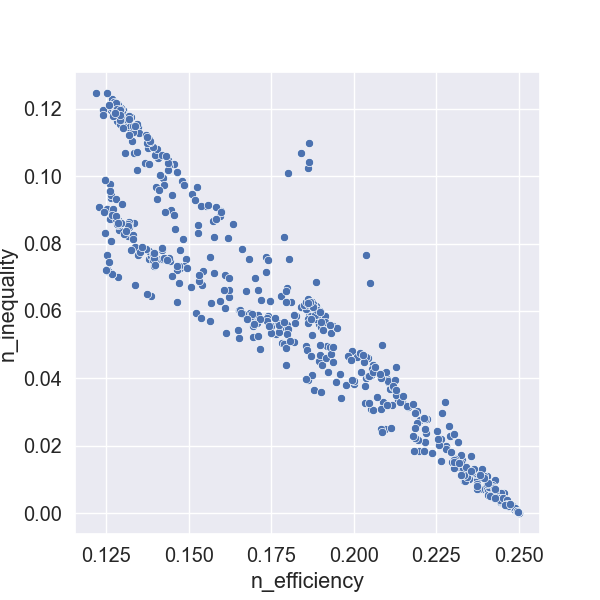

In [10]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='n_efficiency', y='n_inequality')

## Standardize data

In [11]:
#df_std = df[['n_efficiency','n_inequality','entropy','info_per_agent']].apply(lambda x: x-np.mean(x))
#df_std = df_std.apply(lambda x: x/np.std(x))
#df_std.head()

In [12]:
#X_dat = df_std.to_numpy()
#X_dat.shape

In [13]:
df_red = df[['n_efficiency','n_inequality','entropy']]
#scaler = MinMaxScaler()
#scaler.fit(df_red)
X_dat = df_red.to_numpy() #scaler.transform(df_red)
X_dat.shape

(601, 3)

# 2D

## t-sne

In [14]:
from sklearn.manifold import TSNE

In [15]:
# Get t-sne embeding with 2 dimensions
tsne = TSNE(n_components=2,learning_rate='auto',perplexity=30,init='random')
tsne_result = tsne.fit_transform(X_dat)
tsne_result.shape

(601, 2)

In [16]:
df_tsne_res = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
df_tsne_res = df_tsne_res.join(df)
df_tsne_res.head()

,tsne_1,tsne_2,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy,ineq_slope
0,0.623435,34.605640,0,418.327125,62.982075,0.205336,0.030933,0.638322,0.250000,1.80,0.811167,0.007082
1,29.317387,-6.795093,1,399.312500,76.854422,0.200052,0.038449,0.396239,0.333333,2.00,0.995627,0.039394
2,-22.512857,5.129464,2,418.073750,363.946987,0.131611,0.114552,0.110636,1.000000,0.00,0.991102,0.113500
3,0.731096,-13.008227,3,429.410625,17.994406,0.237143,0.009954,0.319465,0.500000,0.85,0.750507,0.000497
4,15.034337,15.210021,4,442.750000,149.967379,0.169609,0.057445,0.500000,0.250000,1.75,0.994307,0.044094


In [17]:
df_tsne_res[(df_tsne_res['tsne_1']>-100) & (df_tsne_res['tsne_1']<20) & (df_tsne_res['tsne_2']>10) & (df_tsne_res['tsne_2']<100)]

,tsne_1,tsne_2,index,efficiency,inequality,n_efficiency,n_inequality,entropy,frequency,info_per_agent,int_entropy,ineq_slope
0,0.623435,34.605640,0,418.327125,62.982075,0.205336,0.030933,0.638322,0.25,1.800,0.811167,0.007082
4,15.034337,15.210021,4,442.750000,149.967379,0.169609,0.057445,0.500000,0.25,1.750,0.994307,0.044094
5,15.635027,15.719319,5,414.687500,124.809045,0.176348,0.053167,0.500000,0.25,2.000,0.949493,-0.015145
7,0.036952,30.998198,7,402.954125,210.828552,0.163563,0.085694,0.598847,0.50,1.500,0.809321,-0.031131
14,17.236662,21.552015,14,425.812500,19.747952,0.240216,0.011160,0.500000,0.25,126.400,0.991499,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.552652,33.055775,566,430.374500,141.999608,0.169636,0.055998,0.646238,0.25,1.125,0.836057,-0.003692
579,14.903720,15.028891,579,450.500000,154.973542,0.167583,0.057646,0.500000,0.25,1.800,0.995118,0.044069
585,16.189499,21.542461,585,442.250000,21.529974,0.232524,0.011337,0.500000,0.25,2.000,0.995306,-0.000279
586,4.041806,33.457447,586,411.625000,46.375957,0.221463,0.024920,0.580482,0.20,2.075,0.909745,0.022604


In [18]:
##Clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_max = 0
max_silh = -1.e6
for n_clusters in range(2,21):
    kmeans = KMeans(
        n_clusters=n_clusters, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

    silhouette_avg = silhouette_score(X_dat, kmeans.labels_)
    if silhouette_avg > max_silh:
        max_silh = silhouette_avg
        n_max = n_clusters
    print(n_clusters, silhouette_avg)

2 0.5183816610312085
3 0.5012954900169947
4 0.5331801620096884
5 0.5499956691109983
6 0.5343920681543941
7 0.5671654921780389
8 0.5615520534832031
9 0.5653412376112001
10 0.5447836161967557
11 0.5248377284570294
12 0.519309420123263
13 0.48887097908982696
14 0.5103219370541727
15 0.4942599848915767
16 0.476407693592076
17 0.479527382313861
18 0.48827017448234755
19 0.48932136302810697
20 0.5089513267390359


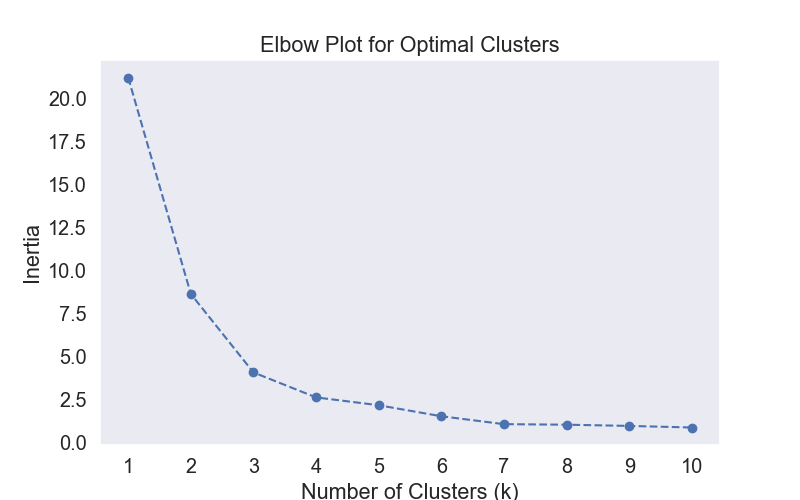

In [19]:
#from sklearn.datasets import make_blobs

## Generate synthetic data for demonstration
## Replace this with your actual dataset (X)
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Function to compute inertia for different numbers of clusters
def plot_elbow(X, max_clusters=10):
    inertia = []
    cluster_range = range(1, max_clusters + 1)

    # Compute K-Means for different cluster counts
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Call the function to plot the elbow
plot_elbow(X_dat, max_clusters=10)

In [46]:
kmeans = KMeans(
        n_clusters=4, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

df_tsne_res['kmeans'] = kmeans.labels_

In [47]:
df_tsne_res.to_csv("tsne_params.csv",index=False)

## Plot results

In [48]:
lab1 = 'efficiency'
lab2 = 'ineq_slope'
lab3 = 'inequality'
lab4 = 'kmeans'

In [49]:
idx = 449
point = [df_tsne_res['tsne_1'][idx], df_tsne_res['tsne_2'][idx]]
point

[np.float32(-6.040464), np.float32(-17.036741)]

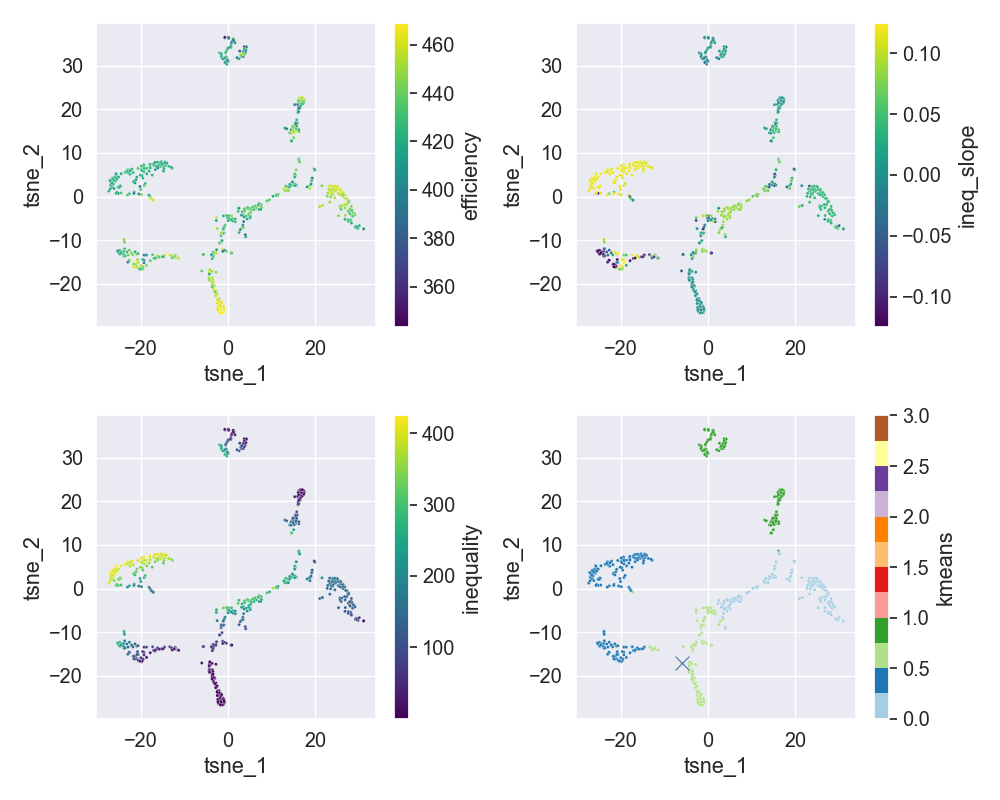

In [50]:
#2D plots
fig1, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

ax1 = sns.scatterplot(data=df_tsne_res, ax=axis[0][0], x='tsne_1', y='tsne_2', hue=lab1, palette='viridis',s=5)
norm1 = plt.Normalize(df_tsne_res[lab1].min(), df_tsne_res[lab1].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
ax1.get_legend().remove()
cb1 = plt.colorbar(mappable=sm1, ax=ax1)
cb1.set_label(lab1)

ax2 = sns.scatterplot(data=df_tsne_res, ax=axis[0][1], x='tsne_1', y='tsne_2', hue=lab2, palette='viridis',s=5)
norm2 = plt.Normalize(df_tsne_res[lab2].min(), df_tsne_res[lab2].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
ax2.get_legend().remove()
cb2 = plt.colorbar(mappable=sm2, ax=ax2)
cb2.set_label(lab2)

ax3 = sns.scatterplot(data=df_tsne_res, ax=axis[1][0], x='tsne_1', y='tsne_2', hue=lab3, palette='viridis',s=5)
norm3 = plt.Normalize(df_tsne_res[lab3].min(), df_tsne_res[lab3].max())
sm3 = plt.cm.ScalarMappable(cmap="viridis", norm=norm3)
sm3.set_array([])
ax3.get_legend().remove()
cb3 = plt.colorbar(mappable=sm3, ax=ax3)
cb3.set_label(lab3)

ax4 = sns.scatterplot(data=df_tsne_res, ax=axis[1][1], x='tsne_1', y='tsne_2', hue=lab4, palette='Paired',s=5)
sns.scatterplot(ax=axis[1][1], x=np.array([point[0]]), y=np.array([point[1]]), marker='x',color='b',s=100)
norm4 = plt.Normalize(df_tsne_res[lab4].min(), df_tsne_res[lab4].max())
sm4 = plt.cm.ScalarMappable(cmap="Paired", norm=norm4)
sm4.set_array([])
ax4.get_legend().remove()
cb4 = plt.colorbar(mappable=sm4, ax=ax4)
cb4.set_label(lab4)

plt.tight_layout()

In [51]:
#df_tsne_res[df_tsne_res['kmeans']==0]

# 3D

## t-sne

In [52]:
# # Get t-sne embeding with 3 dimensions
# tsne3 = TSNE(3,perplexity=30,random_state=123)
# tsne_result3 = tsne3.fit_transform(X_dat)
# tsne_result3.shape

In [53]:
# df_tsne_res3 = pd.DataFrame({'tsne_1': tsne_result3[:,0], 'tsne_2': tsne_result3[:,1], 'tsne_3': tsne_result3[:,2]})
# df_tsne_res3 = df_tsne_res3.join(df)
# df_tsne_res3.head()

## Plot results

In [54]:
# #3D plots

# fig = plt.figure(figsize=(14,14))
# ax1 = fig.add_subplot(2,2,1,projection='3d')
# fig.add_axes(ax1)
# sc1 = ax1.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab1], cmap='viridis')#, vmin=-200, vmax=200)
# ax1.set_xlabel('tsne_1')
# ax1.set_ylabel('tsne_2')
# ax1.set_zlabel('tsne_3')
# cbar1 = plt.colorbar(sc1)
# cbar1.set_label(lab1)

# ax2 = fig.add_subplot(2,2,2,projection='3d')
# fig.add_axes(ax2)
# sc2 = ax2.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab2], cmap='viridis')
# ax2.set_xlabel('tsne_1')
# ax2.set_ylabel('tsne_2')
# ax2.set_zlabel('tsne_3')
# cbar2 = plt.colorbar(sc2)
# cbar2.set_label(lab2)

# ax3 = fig.add_subplot(2,2,3,projection='3d')
# fig.add_axes(ax3)
# sc3 = ax3.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab3], cmap='viridis')
# ax3.set_xlabel('tsne_1')
# ax3.set_ylabel('tsne_2')
# ax3.set_zlabel('tsne_3')
# cbar3 = plt.colorbar(sc3)
# cbar3.set_label(lab3)

# ax4 = fig.add_subplot(2,2,4,projection='3d')
# fig.add_axes(ax4)
# sc4 = ax4.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab4], cmap='viridis')
# ax4.set_xlabel('tsne_1')
# ax4.set_ylabel('tsne_2')
# ax4.set_zlabel('tsne_3')
# cbar4 = plt.colorbar(sc4)
# cbar4.set_label(lab4)



# #plt.show()

In [55]:
#af = AffinityPropagation(damping=0.8,max_iter=3000,preference=-3, random_state=0).fit(X_dat)
#cluster_centers_indices = af.cluster_centers_indices_
#labels = af.labels_
#n_clusters = len(cluster_centers_indices)
#n_clusters, len(np.unique(labels))

In [56]:
##3D plot clustering
#lab = 'labels'

#fig0 = plt.figure(figsize=(8,8))
#ax = Axes3D(fig0)
#fig0.add_axes(ax)

#sc = ax.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=labels, cmap='Paired')#cmap='tab20')
#ax.set_xlabel('tsne_1')
#ax.set_ylabel('tsne_2')
#ax.set_zlabel('tsne_3')
#cbar = plt.colorbar(sc)
#cbar.set_label(lab)

##plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.datasets import make_classification

# # Generate synthetic data for demonstration
# # Replace this with your actual dataset
# X, y = make_classification(
#    n_samples=1000,
#    n_features=5,
#    n_informative=3,
#    n_classes=3,
#    n_clusters_per_class=1,
#    random_state=42
# )

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dat, kmeans.labels_, test_size=0.3, random_state=42)

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        47
           1       0.93      1.00      0.96        65
           2       1.00      0.68      0.81        40
           3       1.00      0.93      0.96        29

    accuracy                           0.92       181
   macro avg       0.94      0.90      0.91       181
weighted avg       0.93      0.92      0.91       181


Confusion Matrix:
[[47  0  0  0]
 [ 0 65  0  0]
 [ 8  5 27  0]
 [ 2  0  0 27]]


/home/carlos/Documents/Information/edgar_german/el_farol/markov_fplay/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [58]:
model.coef_

array([[-1.76853261,  1.31323852,  2.31807249],
       [-1.38116324,  1.6662166 , -8.10482714],
       [ 2.3713254 , -2.19943596, -2.05602481],
       [ 0.77837045, -0.78001916,  7.84277946]])